# Importacion de librerias y comprobacion de rocm

In [2]:
import torch
import torchvision
import sklearn 
import matplotlib
import matplotlib.pyplot as plt  # Importar pyplot de matplotlib
import numpy as np

print("PyTorch version:", torch.__version__)
print("TorchVision version:", torchvision.__version__)
print("scikit-learn version:", sklearn.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("NumPy version:", np.__version__)


PyTorch version: 2.4.0a0+git658ccaa
TorchVision version: 0.19.0a0+69e03db
scikit-learn version: 1.5.1
Matplotlib version: 3.7.1
NumPy version: 1.26.4


In [3]:
import torch

# Verificar si ROCm está disponible
if torch.cuda.is_available():
    print("ROCm está disponible.")
    # Obtener información sobre la GPU
    print(f"Nombre de la GPU: {torch.cuda.get_device_name(0)}")
    print(f"Total de memoria en la GPU: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")
else:
    print("ROCm no está disponible.")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

ROCm está disponible.
Nombre de la GPU: AMD Radeon RX 6600M
Total de memoria en la GPU: 7.98 GB


In [4]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import os
from imageio import imread, imwrite
import matplotlib.pyplot as plt

# Importacion de Dataset

Se importa el datset y se imprime una imagen de prueba

Cargando set de entrenamiento...¡Listo!


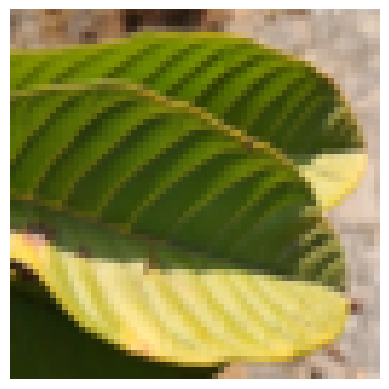

In [17]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

dataset_path = 'data/prueba5mil/'

# Definir las transformaciones
transformaciones = transforms.Compose([
    transforms.Resize((64, 64)),              # Redimensionar a 64x64
    transforms.ToTensor(),                    # Convertir la imagen a tensor
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalizar entre [-1, 1]
])

# Función para cargar el dataset
def cargar_datos(batch_size=128):
    print('Cargando set de entrenamiento...', end="", flush=True)
    
    # Usar ImageFolder para cargar las imágenes
    dataset = ImageFolder(root=dataset_path, transform=transformaciones)
    
    # Usar DataLoader para obtener lotes de datos
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    
    print('¡Listo!')
    return dataloader

# Cargar datos
train_loader = cargar_datos(batch_size=128)

# Función para visualizar una imagen del dataset
def visualizar_imagen(dataloader):
    # Obtener un batch de datos
    dataiter = iter(dataloader)
    images, _ = next(dataiter)

    # Desnormalizar la imagen para visualizarla
    img = images[0].numpy().transpose((1, 2, 0))
    img = img * 0.5 + 0.5  # Escalar de nuevo entre [0, 1]
    
    # Mostrar la imagen
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Visualizar una imagen del dataset
visualizar_imagen(train_loader)


# Generador y Discriminador para 128x128

Primeramente se probo un generador y discriminador para imagenes de 128x128, sin embargo luego se decidio hacer para 64x64

In [13]:
import torch
import torch.optim as optim
import torch.nn as nn

# Asegurarse de que el dispositivo sea correcto (GPU si está disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parámetros
TAM_ENTRADA = 100  # Tamaño de la entrada del generador (vector de ruido)
TAM_LOTE = 128     # Tamaño del lote
LEAKY_SLOPE = 0.2

# Clase Generador (ya definida en tu código)
class Generador(nn.Module):
    def __init__(self):
        super(Generador, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(TAM_ENTRADA, 1024 * 4 * 4, bias=False),
            nn.BatchNorm1d(1024 * 4 * 4, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Unflatten(1, (1024, 4, 4)),
            nn.ConvTranspose2d(1024, 512, kernel_size=5, stride=2, padding=2, output_padding=1, bias=False),
            nn.BatchNorm2d(512, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.ConvTranspose2d(512, 256, kernel_size=5, stride=2, padding=2, output_padding=1, bias=False),
            nn.BatchNorm2d(256, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.ConvTranspose2d(256, 128, kernel_size=5, stride=2, padding=2, output_padding=1, bias=False),
            nn.BatchNorm2d(128, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2, padding=2, output_padding=1, bias=False),
            nn.BatchNorm2d(64, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.ConvTranspose2d(64, 3, kernel_size=5, stride=2, padding=2, output_padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Clase Discriminador (ya definida en tu código)
class Discriminador(nn.Module):
    def __init__(self):
        super(Discriminador, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=5, stride=2, padding=2, bias=False),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2, bias=False),
            nn.BatchNorm2d(128, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Conv2d(128, 256, kernel_size=5, stride=2, padding=2, bias=False),
            nn.BatchNorm2d(256, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Conv2d(256, 512, kernel_size=5, stride=2, padding=2, bias=False),
            nn.BatchNorm2d(512, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Conv2d(512, 1024, kernel_size=5, stride=2, padding=2, bias=False),
            nn.BatchNorm2d(1024, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Flatten(),
            nn.Linear(1024 * 4 * 4, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Instanciar los modelos
generador = Generador().to(device)
discriminador = Discriminador().to(device)

# Probar el generador con entradas aleatorias
ruido_aleatorio = torch.randn(TAM_LOTE, TAM_ENTRADA, device=device)  # Lote de ruido
imagenes_generadas = generador(ruido_aleatorio)

# Mostrar las dimensiones de la salida del generador
print(f"Dimensiones de las imágenes generadas: {imagenes_generadas.shape}")

# Probar el discriminador con las imágenes generadas
salida_discriminador = discriminador(imagenes_generadas)

# Mostrar las dimensiones de la salida del discriminador
print(f"Dimensiones de la salida del discriminador: {salida_discriminador.shape}")


Dimensiones de las imágenes generadas: torch.Size([128, 3, 128, 128])
Dimensiones de la salida del discriminador: torch.Size([128, 1])


# Generador de Discriminador y Generador para 64x64

In [16]:
import torch
import torch.optim as optim
import torch.nn as nn

# Asegurarse de que el dispositivo sea correcto (GPU si está disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parámetros
TAM_ENTRADA = 100  # Tamaño de la entrada del generador (vector de ruido)
TAM_LOTE = 128     # Tamaño del lote
LEAKY_SLOPE = 0.2  # Slope del LeakyReLU

# Clase Generador para imágenes 64x64
class Generador(nn.Module):
    def __init__(self):
        super(Generador, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(TAM_ENTRADA, 1024 * 4 * 4, bias=False),
            nn.BatchNorm1d(1024 * 4 * 4, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Unflatten(1, (1024, 4, 4)),
            nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.ConvTranspose2d(128, 3, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Clase Discriminador para imágenes 64x64
class Discriminador(nn.Module):
    def __init__(self):
        super(Discriminador, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Conv2d(512, 1024, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(1024, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Flatten(),
            nn.Linear(1024 * 4 * 4, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Instanciar los modelos
generador = Generador().to(device)
discriminador = Discriminador().to(device)

# Probar el generador con entradas aleatorias
ruido_aleatorio = torch.randn(TAM_LOTE, TAM_ENTRADA, device=device)  # Lote de ruido
imagenes_generadas = generador(ruido_aleatorio)

# Mostrar las dimensiones de la salida del generador
print(f"Dimensiones de las imágenes generadas: {imagenes_generadas.shape}")

# Probar el discriminador con las imágenes generadas
salida_discriminador = discriminador(imagenes_generadas)

# Mostrar las dimensiones de la salida del discriminador
print(f"Dimensiones de la salida del discriminador: {salida_discriminador.shape}")


Dimensiones de las imágenes generadas: torch.Size([128, 3, 64, 64])
Dimensiones de la salida del discriminador: torch.Size([128, 1])


## Funciones de entrenamiento de la DCGAN

Se definio varios modelos probando  cual funcionaba mejor para nuestro dataset. El más correcto (donde se freezea el discriminador cuando se entrena el generador y visceversa) esta al final de este cuadernillo, sin embargo aplicando con pesos = 0 esa funcion no daba resultados buenos, por lo que primero se opto por mantene unfreezed ambos para obtener pesos.

In [113]:
import numpy as np

def entrenar_gan(train_loader, epochs=200):
    # Inicializar el historial de pérdidas
    hist = {'g_loss': [], 'd_loss': []}

    for epoch in range(1, epochs + 1):
        g_loss_epoch = []
        d_loss_epoch = []

        for i, (imagenes_reales, _) in enumerate(train_loader):
            batch_size = imagenes_reales.size(0)
            imagenes_reales = imagenes_reales.to(device)

            # Crear etiquetas reales y falsas
            etiquetas_reales = torch.ones(batch_size, 1).to(device)
            etiquetas_falsas = torch.zeros(batch_size, 1).to(device)

            ### Entrenamiento del Discriminador ###
            discriminador.train()  # Asegúrate de que el discriminador esté en modo entrenamiento
            generador.train()  # También asegura que el generador esté en modo entrenamiento

            
            ### Entrenamiento del Discriminador ###
            discriminador.zero_grad()

            # Entrenar con imágenes reales
            salida_reales = discriminador(imagenes_reales)
            perdida_reales = criterio(salida_reales, etiquetas_reales)
            perdida_reales.backward()

            # Generar imágenes falsas
            ruido = torch.randn(batch_size, TAM_ENTRADA, device=device)
            imagenes_falsas = generador(ruido)

            # Entrenar con imágenes falsas
            salida_falsas = discriminador(imagenes_falsas.detach())  # Detach para que el generador no reciba gradientes aquí
            perdida_falsas = criterio(salida_falsas, etiquetas_falsas)
            perdida_falsas.backward()

            # Actualizar el discriminador
            opt_discriminador.step()
            opt_discriminador.zero_grad()

            # Guardar pérdidas del discriminador para esta iteración
            d_loss_epoch.append(perdida_reales.item() + perdida_falsas.item())

            ### Entrenamiento del Generador ###
            generador.zero_grad()

            # Generar imágenes falsas
            ruido = torch.randn(batch_size, TAM_ENTRADA, device=device)
            imagenes_falsas = generador(ruido)

            # El generador quiere que el discriminador clasifique sus imágenes falsas como reales
            salida_falsas = discriminador(imagenes_falsas)
            perdida_generador = criterio(salida_falsas, etiquetas_reales)  # Queremos que se clasifiquen como reales
            perdida_generador.backward()

            # Actualizar el generador
            opt_generador.step()
            opt_generador.zero_grad()

            # Guardar pérdidas del generador para esta iteración
            g_loss_epoch.append(perdida_generador.item())

        # Al final de cada época, calcular y guardar las pérdidas promedio
        avg_d_loss = np.mean(d_loss_epoch)
        avg_g_loss = np.mean(g_loss_epoch)
        hist['d_loss'].append(avg_d_loss)
        hist['g_loss'].append(avg_g_loss)

        # Mostrar pérdidas cada cierta cantidad de épocas
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Pérdida del Discriminador: {avg_d_loss:.4f}, Pérdida del Generador: {avg_g_loss:.4f}")

        # Generar y guardar imágenes cada 100 épocas
        if epoch % 20 == 0:
            graficar_imagenes_generadas(epoch, generador)

    return hist


Para no sobrecargar el cuadernillo, cada 20 epochs se llama a la funcion graficar_imagenes_generadas que genera imagenes y las guarda en archivos en las rutas indicadas, esto para ver el proceso de aprendizaje del DCGAN

In [71]:
# Visualización de algunas imágenes obtenidas con el generador
import os

def graficar_imagenes_generadas(epoch, generador, ejemplos=16, dim=(4,4), figsize=(10,10)):
    # Crear el directorio si no existe
    if not os.path.exists('data/ejemplos'):
        os.makedirs('data/ejemplos')
    
    # Generar imágenes
    ruido = torch.randn(ejemplos, TAM_ENTRADA).to(device)
    imagenes_generadas = generador(ruido)
    imagenes_generadas = imagenes_generadas.cpu().detach().numpy()
    imagenes_generadas = (imagenes_generadas * 127.5 + 127.5).astype(np.uint8)
    
    # Graficar imágenes
    plt.figure(figsize=figsize)
    for i in range(ejemplos):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(imagenes_generadas[i].transpose(1, 2, 0))
        plt.axis('off')
    
    # Guardar la imagen en el directorio especificado
    plt.tight_layout()
    plt.savefig(f'data/ejemplos/GAN_imagen_generada_{epoch}.png')
    plt.close()



def generar_imagenes(generador, nimagenes, ejemplos='data/ejemplos'):
    # Crear el directorio si no existe
    if not os.path.exists(ejemplos):
        os.makedirs(ejemplos)
    
    # Generar imágenes
    ruido = torch.randn(nimagenes, TAM_ENTRADA).to(device)
    imagenes_generadas = generador(ruido)
    imagenes_generadas = imagenes_generadas.cpu().detach().numpy()
    imagenes_generadas = (imagenes_generadas * 127.5 + 127.5).astype(np.uint8)
    
    # Guardar imágenes en el directorio especificado
    for i in range(nimagenes):
        ruta_imagen = os.path.join(ejemplos, 'ejemplo_' + str(i) + '.png')
        imwrite(ruta_imagen, imagenes_generadas[i].transpose(1, 2, 0))

In [63]:
import torch.nn.init as init

def reinicializar_pesos(modelo):
    for m in modelo.modules():
        if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
            init.normal_(m.weight.data, 0.0, 0.02)
            if m.bias is not None:
                init.constant_(m.bias.data, 0)

Una vez realizadas las pruebas necesarias ya teniamos más claro cual es el mejor modelo que favorecia a una mejor generacion de imagenes, por lo que reiniciamos los pesos para entrenar de nuevo sin los malos resultados de unas pruebas donde no se obtenia buenos resultados

In [64]:
reinicializar_pesos(generador)
reinicializar_pesos(discriminador)


In [65]:
# Definir algunos parámetros clave
N_ITS = 500  # Número de iteraciones o epochs
TAM_ENTRADA = 100  # Tamaño del vector de ruido
TAM_LOTE = 128  # Tamaño del lote

# Inicializar el criterio de pérdida (Binary Cross Entropy Loss)
criterio = nn.BCELoss()

# Optimizadores para el generador y el discriminador
opt_generador = optim.Adam(generador.parameters(), lr=0.0002, betas=(0.5, 0.999))
opt_discriminador = optim.Adam(discriminador.parameters(), lr=0.0002, betas=(0.5, 0.999))


In [66]:

# Llamar a la función y guardar el historial en una variable
hist = entrenar_gan(train_loader, epochs=N_ITS)


Epoch 10/500 - Pérdida del Discriminador: 0.5460, Pérdida del Generador: 6.7777
Epoch 20/500 - Pérdida del Discriminador: 0.7182, Pérdida del Generador: 5.7908
Epoch 30/500 - Pérdida del Discriminador: 0.5756, Pérdida del Generador: 5.1968
Epoch 40/500 - Pérdida del Discriminador: 0.3772, Pérdida del Generador: 4.5892
Epoch 50/500 - Pérdida del Discriminador: 1.2247, Pérdida del Generador: 5.3491
Epoch 60/500 - Pérdida del Discriminador: 0.8715, Pérdida del Generador: 6.1298
Epoch 70/500 - Pérdida del Discriminador: 0.1998, Pérdida del Generador: 5.1019
Epoch 80/500 - Pérdida del Discriminador: 0.1435, Pérdida del Generador: 6.2652
Epoch 90/500 - Pérdida del Discriminador: 0.2326, Pérdida del Generador: 7.9420
Epoch 100/500 - Pérdida del Discriminador: 0.1221, Pérdida del Generador: 5.3359
Epoch 110/500 - Pérdida del Discriminador: 0.5686, Pérdida del Generador: 5.1371
Epoch 120/500 - Pérdida del Discriminador: 0.6272, Pérdida del Generador: 6.0259
Epoch 130/500 - Pérdida del Discrimin

En este caso, se puede ver como va reduciendo el error del generador indicando que esta aumentando su rpecision

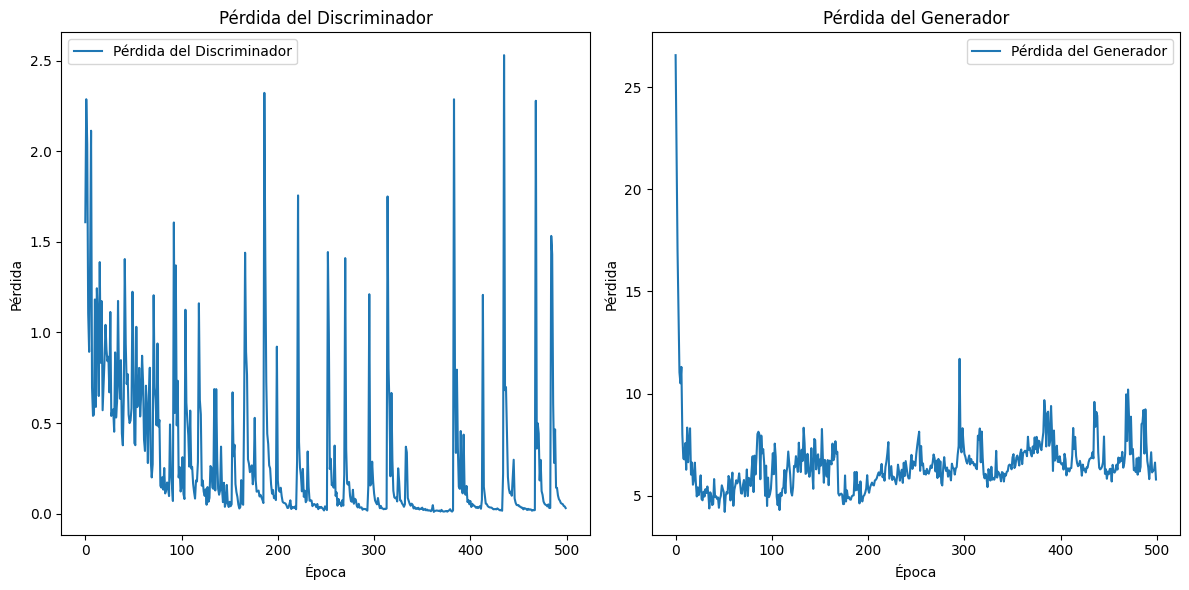

In [67]:
import matplotlib.pyplot as plt

# Graficar pérdidas del generador y del discriminador
plt.figure(figsize=(12, 6))

# Pérdidas del discriminador
plt.subplot(1, 2, 1)
plt.plot(hist['d_loss'], label='Pérdida del Discriminador')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida del Discriminador')
plt.legend()

# Pérdidas del generador
plt.subplot(1, 2, 2)
plt.plot(hist['g_loss'], label='Pérdida del Generador')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida del Generador')
plt.legend()

plt.tight_layout()
plt.show()


Guardamos los modelos del primer modelo que dio resultados aceptables

In [68]:
import torch

# Ruta para guardar los modelos
ruta_generador = 'generador1.pth'
ruta_discriminador = 'discriminador1.pth'

# Guardar el estado del generador y del discriminador
torch.save(generador.state_dict(), ruta_generador)
torch.save(discriminador.state_dict(), ruta_discriminador)

print(f"Modelos guardados en {ruta_generador} y {ruta_discriminador}")

Modelos guardados en generador1.pth y discriminador1.pth


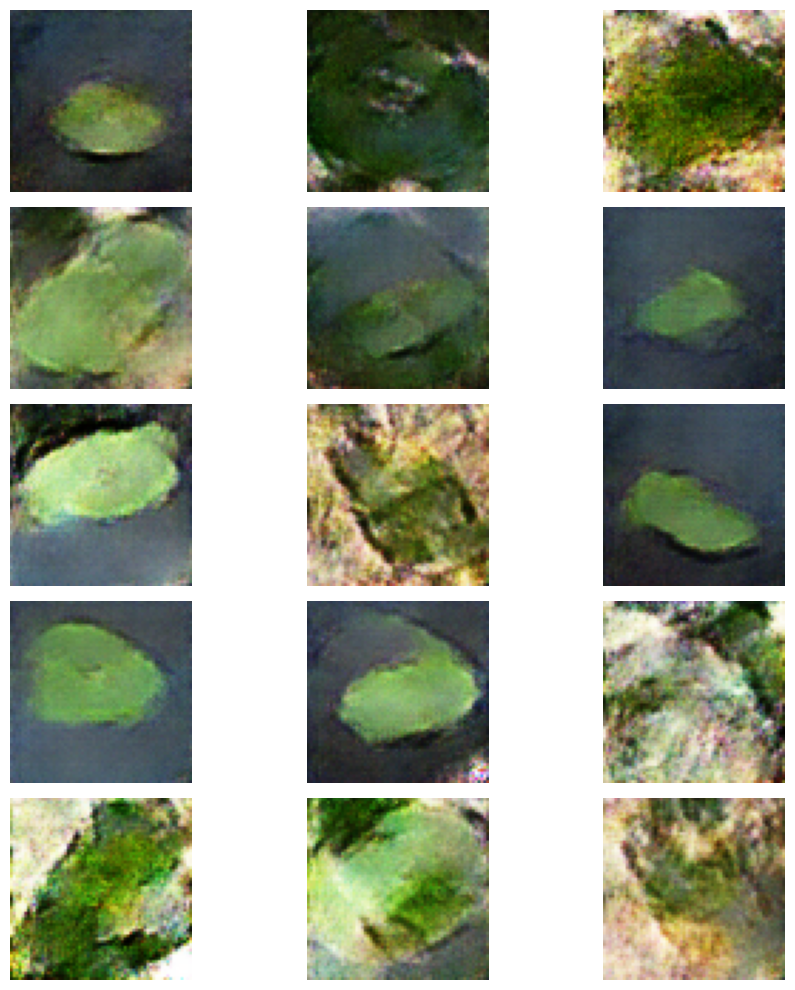

In [75]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Cargar el generador y ponerlo en el mismo dispositivo que los datos
generador = Generador()  # Reemplaza con la instancia correcta
generador.load_state_dict(torch.load('generador1.pth'))
generador.to(device)  # Asegúrate de que el generador esté en el dispositivo correcto
generador.eval()  # Poner el generador en modo evaluación

# Generar imágenes
n_imagenes = 15
ruido = torch.randn(n_imagenes, TAM_ENTRADA).to(device)  # Generar ruido en el mismo dispositivo
imagenes_generadas = generador(ruido)  # Generar imágenes
imagenes_generadas = imagenes_generadas.cpu().detach().numpy()  # Convertir a numpy
imagenes_generadas = (imagenes_generadas * 127.5 + 127.5).astype(np.uint8)  # Normalizar a [0, 255]

# Graficar las imágenes generadas
plt.figure(figsize=(10, 10))
for i in range(n_imagenes):
    plt.subplot(5, 3, i + 1)
    plt.imshow(imagenes_generadas[i].transpose(1, 2, 0))  # Transponer para formato HWC
    plt.axis('off')
plt.tight_layout()
plt.show()


In [80]:
# Crear una instancia de los modelos (asegúrate de usar la misma arquitectura)

generador = Generador().to(device)
discriminador = Discriminador().to(device)
# Cargar el estado de los modelos
generador.load_state_dict(torch.load('generador1.pth'))
discriminador.load_state_dict(torch.load('discriminador1.pth'))

# Opcionalmente, poner los modelos en modo de evaluación si solo vas a hacer inferencia
generador.train()
discriminador.train()


Discriminador(
  (model): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(256, eps=1e-05, momentum=0.3, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(512, eps=1e-05, momentum=0.3, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(1024, eps=1e-05, momentum=0.3, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2)
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=16384, out_features=1, bias=False)
    (13): Sigmoid()
  )
)

Cargamos el modelo para seguir entrenando por otros 500 episodios para ver la mejora y comportamiento de las perdidas

In [81]:

# Llamar a la función y guardar el historial en una variable
hist = entrenar_gan(train_loader, epochs=N_ITS)


Epoch 10/500 - Pérdida del Discriminador: 0.0426, Pérdida del Generador: 4.8485
Epoch 20/500 - Pérdida del Discriminador: 0.0410, Pérdida del Generador: 4.7534
Epoch 30/500 - Pérdida del Discriminador: 0.0433, Pérdida del Generador: 4.8287
Epoch 40/500 - Pérdida del Discriminador: 0.0444, Pérdida del Generador: 4.8166
Epoch 50/500 - Pérdida del Discriminador: 0.0417, Pérdida del Generador: 4.9157
Epoch 60/500 - Pérdida del Discriminador: 0.0431, Pérdida del Generador: 4.6790
Epoch 70/500 - Pérdida del Discriminador: 0.0429, Pérdida del Generador: 4.7405
Epoch 80/500 - Pérdida del Discriminador: 0.0407, Pérdida del Generador: 4.8226
Epoch 90/500 - Pérdida del Discriminador: 0.0362, Pérdida del Generador: 4.9610
Epoch 100/500 - Pérdida del Discriminador: 0.0447, Pérdida del Generador: 4.8074
Epoch 110/500 - Pérdida del Discriminador: 0.0377, Pérdida del Generador: 4.8757
Epoch 120/500 - Pérdida del Discriminador: 0.0399, Pérdida del Generador: 4.9428
Epoch 130/500 - Pérdida del Discrimin

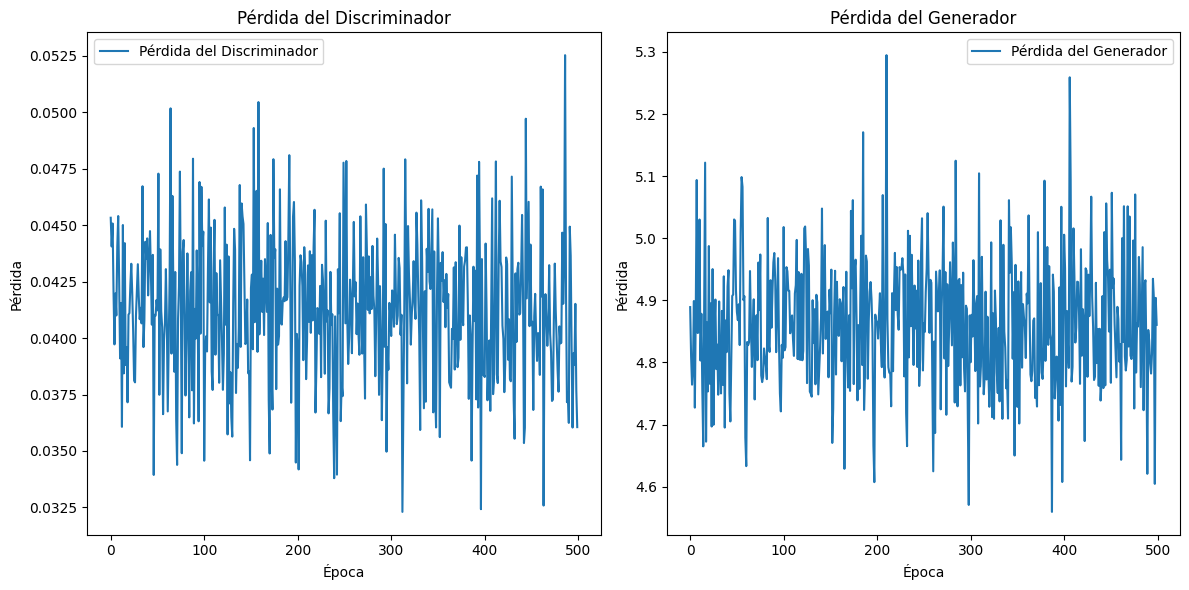

In [82]:
import matplotlib.pyplot as plt

# Graficar pérdidas del generador y del discriminador
plt.figure(figsize=(12, 6))

# Pérdidas del discriminador
plt.subplot(1, 2, 1)
plt.plot(hist['d_loss'], label='Pérdida del Discriminador')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida del Discriminador')
plt.legend()

# Pérdidas del generador
plt.subplot(1, 2, 2)
plt.plot(hist['g_loss'], label='Pérdida del Generador')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida del Generador')
plt.legend()

plt.tight_layout()
plt.show()


Guardamos el modelo, sin embargo se puede ver que no hubo mejoras significativas indicando que se pudo haber estancado en un minimo local y por eso no aumenta la precision del generador

In [83]:
import torch

# Ruta para guardar los modelos
ruta_generador = 'generador2.pth'
ruta_discriminador = 'discriminador2.pth'

# Guardar el estado del generador y del discriminador
torch.save(generador.state_dict(), ruta_generador)
torch.save(discriminador.state_dict(), ruta_discriminador)

print(f"Modelos guardados en {ruta_generador} y {ruta_discriminador}")

Modelos guardados en generador2.pth y discriminador2.pth


## Funcion aplicando freeze y unfreeze intercalado de generador y discriminador

In [109]:
import numpy as np
import torch

def entrenar_gan(train_loader, epochs=200):
    # Inicializar el historial de pérdidas
    hist = {'g_loss': [], 'd_loss': []}

    for epoch in range(1, epochs + 1):
        g_loss_epoch = []
        d_loss_epoch = []

        for i, (imagenes_reales, _) in enumerate(train_loader):

            discriminador.train()
            generador.eval()
            
            batch_size = imagenes_reales.size(0)
            imagenes_reales = imagenes_reales.to(device)

            # Crear etiquetas reales y falsas
            etiquetas_reales = torch.ones(batch_size, 1).to(device)
            etiquetas_falsas = torch.zeros(batch_size, 1).to(device)

            ### Entrenamiento del Discriminador ###
            

            discriminador.zero_grad()

            # Entrenar con imágenes reales
            salida_reales = discriminador(imagenes_reales)
            perdida_reales = criterio(salida_reales, etiquetas_reales)
            perdida_reales.backward()

            # Generar imágenes falsas
            ruido = torch.randn(batch_size, TAM_ENTRADA, device=device)
            imagenes_falsas = generador(ruido)

            # Entrenar con imágenes falsas
            salida_falsas = discriminador(imagenes_falsas.detach())
            perdida_falsas = criterio(salida_falsas, etiquetas_falsas)
            perdida_falsas.backward()

            # Actualizar el discriminador
            opt_discriminador.step()
            opt_discriminador.zero_grad()

            # Guardar pérdidas del discriminador para esta iteración
            d_loss_epoch.append(perdida_reales.item() + perdida_falsas.item())

            discriminador.eval()
            generador.train()
            
            ### Entrenamiento del Generador ###
            generador.zero_grad()

            # Generar imágenes falsas
            ruido = torch.randn(batch_size, TAM_ENTRADA, device=device)
            imagenes_falsas = generador(ruido)

            # El generador quiere que el discriminador clasifique sus imágenes falsas como reales
            salida_falsas = discriminador(imagenes_falsas)
            perdida_generador = criterio(salida_falsas, etiquetas_reales)
            perdida_generador.backward()

            # Actualizar el generador
            opt_generador.step()
            opt_generador.zero_grad()

            # Guardar pérdidas del generador para esta iteración
            g_loss_epoch.append(perdida_generador.item())

        # Al final de cada época, calcular y guardar las pérdidas promedio
        avg_d_loss = np.mean(d_loss_epoch)
        avg_g_loss = np.mean(g_loss_epoch)
        hist['d_loss'].append(avg_d_loss)
        hist['g_loss'].append(avg_g_loss)

        # Mostrar pérdidas cada cierta cantidad de épocas
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Pérdida del Discriminador: {avg_d_loss:.4f}, Pérdida del Generador: {avg_g_loss:.4f}")

        # Generar y guardar imágenes cada 100 épocas
        if epoch % 20 == 0:
            graficar_imagenes_generadas(epoch, generador)

        # Actualizar los optimizadores (si se usa LR scheduler)
        if scheduler_d:
            scheduler_d.step()
        if scheduler_g:
            scheduler_g.step()

    return hist


In [85]:
# Crear una instancia de los modelos (asegúrate de usar la misma arquitectura)

generador = Generador().to(device)
discriminador = Discriminador().to(device)
# Cargar el estado de los modelos
generador.load_state_dict(torch.load('generador2.pth'))
discriminador.load_state_dict(torch.load('discriminador2.pth'))

# Opcionalmente, poner los modelos en modo de evaluación si solo vas a hacer inferencia
generador.train()
discriminador.train()


Discriminador(
  (model): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(256, eps=1e-05, momentum=0.3, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(512, eps=1e-05, momentum=0.3, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(1024, eps=1e-05, momentum=0.3, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2)
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=16384, out_features=1, bias=False)
    (13): Sigmoid()
  )
)

Se realizo el entrenamiento continuando el anterior que se realizo con el modelo donde no se freezeaba el discriminador ni el generador

In [87]:
scheduler_d = optim.lr_scheduler.StepLR(opt_discriminador, step_size=10, gamma=0.9)
scheduler_g = optim.lr_scheduler.StepLR(opt_generador, step_size=10, gamma=0.9)

# Llamar a la función y guardar el historial en una variable
hist = entrenar_gan(train_loader, epochs=N_ITS)


Epoch 10/500 - Pérdida del Discriminador: 0.0330, Pérdida del Generador: 3.0706
Epoch 20/500 - Pérdida del Discriminador: 0.0476, Pérdida del Generador: 2.8469
Epoch 30/500 - Pérdida del Discriminador: 0.0379, Pérdida del Generador: 2.9762
Epoch 40/500 - Pérdida del Discriminador: 0.0378, Pérdida del Generador: 3.0887
Epoch 50/500 - Pérdida del Discriminador: 0.0513, Pérdida del Generador: 2.7378
Epoch 60/500 - Pérdida del Discriminador: 0.0380, Pérdida del Generador: 2.9415
Epoch 70/500 - Pérdida del Discriminador: 0.0408, Pérdida del Generador: 2.9327
Epoch 80/500 - Pérdida del Discriminador: 0.0510, Pérdida del Generador: 2.9053
Epoch 90/500 - Pérdida del Discriminador: 0.0454, Pérdida del Generador: 2.9604
Epoch 100/500 - Pérdida del Discriminador: 0.0403, Pérdida del Generador: 3.0397
Epoch 110/500 - Pérdida del Discriminador: 0.0401, Pérdida del Generador: 3.0076
Epoch 120/500 - Pérdida del Discriminador: 0.0414, Pérdida del Generador: 2.9053
Epoch 130/500 - Pérdida del Discrimin

Aplicando el freezeo al inicio daba malos resultados, sin embargo aplicandolo cuando ya tenemos un buen discriminador, entonces si se obtuvo una mejora en la perdida del generador

In [88]:
import torch

# Ruta para guardar los modelos
ruta_generador = 'generador3.pth'
ruta_discriminador = 'discriminador3.pth'

# Guardar el estado del generador y del discriminador
torch.save(generador.state_dict(), ruta_generador)
torch.save(discriminador.state_dict(), ruta_discriminador)

print(f"Modelos guardados en {ruta_generador} y {ruta_discriminador}")

Modelos guardados en generador3.pth y discriminador3.pth


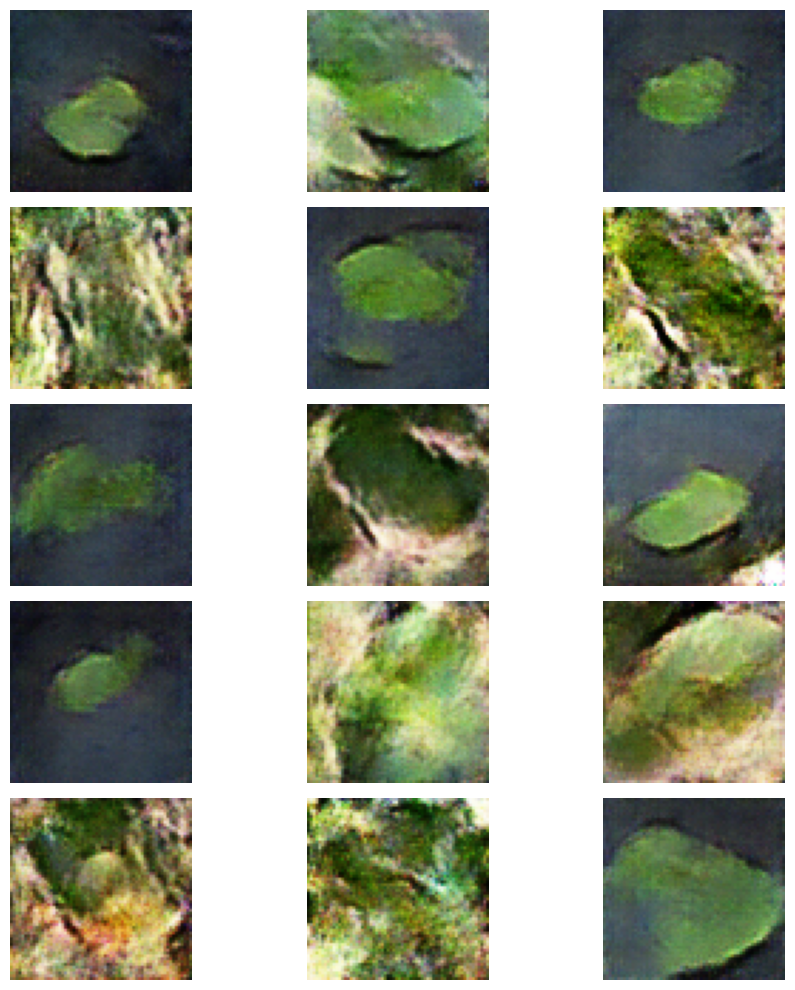

In [89]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Cargar el generador y ponerlo en el mismo dispositivo que los datos
generador = Generador()  # Reemplaza con la instancia correcta
generador.load_state_dict(torch.load('generador3.pth'))
generador.to(device)  # Asegúrate de que el generador esté en el dispositivo correcto
generador.eval()  # Poner el generador en modo evaluación

# Generar imágenes
n_imagenes = 15
ruido = torch.randn(n_imagenes, TAM_ENTRADA).to(device)  # Generar ruido en el mismo dispositivo
imagenes_generadas = generador(ruido)  # Generar imágenes
imagenes_generadas = imagenes_generadas.cpu().detach().numpy()  # Convertir a numpy
imagenes_generadas = (imagenes_generadas * 127.5 + 127.5).astype(np.uint8)  # Normalizar a [0, 255]

# Graficar las imágenes generadas
plt.figure(figsize=(10, 10))
for i in range(n_imagenes):
    plt.subplot(5, 3, i + 1)
    plt.imshow(imagenes_generadas[i].transpose(1, 2, 0))  # Transponer para formato HWC
    plt.axis('off')
plt.tight_layout()
plt.show()


Graficamos las imagenes generadas

## Aplicando optimizaciones a la funcion de entrenamiento de la DCGAN

In [104]:
import numpy as np
import torch

def entrenar_gan(train_loader, epochs=200):
    # Inicializar el historial de pérdidas
    hist = {'g_loss': [], 'd_loss': []}

    for epoch in range(1, epochs + 1):
        g_loss_epoch = []
        d_loss_epoch = []

        for i, (imagenes_reales, _) in enumerate(train_loader):

            # Asegúrate de que el discriminador esté en modo entrenamiento
            discriminador.train()
            # Asegúrate de que el generador esté en modo entrenamiento cuando se entrena
            generador.train()

            batch_size = imagenes_reales.size(0)
            imagenes_reales = imagenes_reales.to(device)

            # Crear etiquetas reales y falsas
            etiquetas_reales = torch.ones(batch_size, 1).to(device)
            etiquetas_falsas = torch.zeros(batch_size, 1).to(device)

            ### Entrenamiento del Discriminador ###
            discriminador.zero_grad()

            # Entrenar con imágenes reales
            salida_reales = discriminador(imagenes_reales)
            perdida_reales = criterio(salida_reales, etiquetas_reales)
            perdida_reales.backward()

            # Generar imágenes falsas
            ruido = torch.randn(batch_size, TAM_ENTRADA, device=device)
            imagenes_falsas = generador(ruido)

            # Entrenar con imágenes falsas
            salida_falsas = discriminador(imagenes_falsas.detach())
            perdida_falsas = criterio(salida_falsas, etiquetas_falsas)
            perdida_falsas.backward()

            # Actualizar el discriminador
            opt_discriminador.step()
            opt_discriminador.zero_grad()

            # Guardar pérdidas del discriminador para esta iteración
            d_loss_epoch.append(perdida_reales.item() + perdida_falsas.item())

            ### Entrenamiento del Generador ###
            # Cambiar a modo de evaluación para el discriminador mientras entrenas el generador
            discriminador.eval()

            generador.zero_grad()

            # Generar imágenes falsas
            ruido = torch.randn(batch_size, TAM_ENTRADA, device=device)
            imagenes_falsas = generador(ruido)

            # El generador quiere que el discriminador clasifique sus imágenes falsas como reales
            salida_falsas = discriminador(imagenes_falsas)
            perdida_generador = criterio(salida_falsas, etiquetas_reales)
            perdida_generador.backward()

            # Actualizar el generador
            opt_generador.step()
            opt_generador.zero_grad()

            # Guardar pérdidas del generador para esta iteración
            g_loss_epoch.append(perdida_generador.item())

        # Al final de cada época, calcular y guardar las pérdidas promedio
        avg_d_loss = np.mean(d_loss_epoch)
        avg_g_loss = np.mean(g_loss_epoch)
        hist['d_loss'].append(avg_d_loss)
        hist['g_loss'].append(avg_g_loss)

        # Mostrar pérdidas cada cierta cantidad de épocas
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Pérdida del Discriminador: {avg_d_loss:.4f}, Pérdida del Generador: {avg_g_loss:.4f}")

        # Generar y guardar imágenes cada 20 épocas
        if epoch % 20 == 0:
            graficar_imagenes_generadas(epoch, generador)

        # Actualizar los optimizadores (si se usa LR scheduler)
        if scheduler_d:
            scheduler_d.step()
        if scheduler_g:
            scheduler_g.step()

    return hist


In [91]:
# Crear una instancia de los modelos (asegúrate de usar la misma arquitectura)

generador = Generador().to(device)
discriminador = Discriminador().to(device)
# Cargar el estado de los modelos
generador.load_state_dict(torch.load('generador3.pth'))
discriminador.load_state_dict(torch.load('discriminador3.pth'))

# Opcionalmente, poner los modelos en modo de evaluación si solo vas a hacer inferencia
generador.train()
discriminador.train()


Discriminador(
  (model): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(256, eps=1e-05, momentum=0.3, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(512, eps=1e-05, momentum=0.3, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(1024, eps=1e-05, momentum=0.3, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2)
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=16384, out_features=1, bias=False)
    (13): Sigmoid()
  )
)

Entrenando desde el checkpoint anterior en la nueva funcion de entrenamiento

In [92]:
scheduler_d = optim.lr_scheduler.StepLR(opt_discriminador, step_size=10, gamma=0.9)
scheduler_g = optim.lr_scheduler.StepLR(opt_generador, step_size=10, gamma=0.9)

# Llamar a la función y guardar el historial en una variable
hist = entrenar_gan(train_loader, epochs=N_ITS)


Epoch 10/500 - Pérdida del Discriminador: 0.0435, Pérdida del Generador: 2.9658
Epoch 20/500 - Pérdida del Discriminador: 0.0364, Pérdida del Generador: 2.9516
Epoch 30/500 - Pérdida del Discriminador: 0.0424, Pérdida del Generador: 2.8030
Epoch 40/500 - Pérdida del Discriminador: 0.0429, Pérdida del Generador: 2.9567
Epoch 50/500 - Pérdida del Discriminador: 0.0405, Pérdida del Generador: 2.9120
Epoch 60/500 - Pérdida del Discriminador: 0.0406, Pérdida del Generador: 2.9038
Epoch 70/500 - Pérdida del Discriminador: 0.0364, Pérdida del Generador: 3.0185
Epoch 80/500 - Pérdida del Discriminador: 0.0420, Pérdida del Generador: 2.8974
Epoch 90/500 - Pérdida del Discriminador: 0.0397, Pérdida del Generador: 2.9721
Epoch 100/500 - Pérdida del Discriminador: 0.0406, Pérdida del Generador: 2.8244
Epoch 110/500 - Pérdida del Discriminador: 0.0471, Pérdida del Generador: 3.0330
Epoch 120/500 - Pérdida del Discriminador: 0.0405, Pérdida del Generador: 3.0861
Epoch 130/500 - Pérdida del Discrimin

In [93]:
import torch

# Ruta para guardar los modelos
ruta_generador = 'generador4.pth'
ruta_discriminador = 'discriminador4.pth'

# Guardar el estado del generador y del discriminador
torch.save(generador.state_dict(), ruta_generador)
torch.save(discriminador.state_dict(), ruta_discriminador)

print(f"Modelos guardados en {ruta_generador} y {ruta_discriminador}")

Modelos guardados en generador4.pth y discriminador4.pth


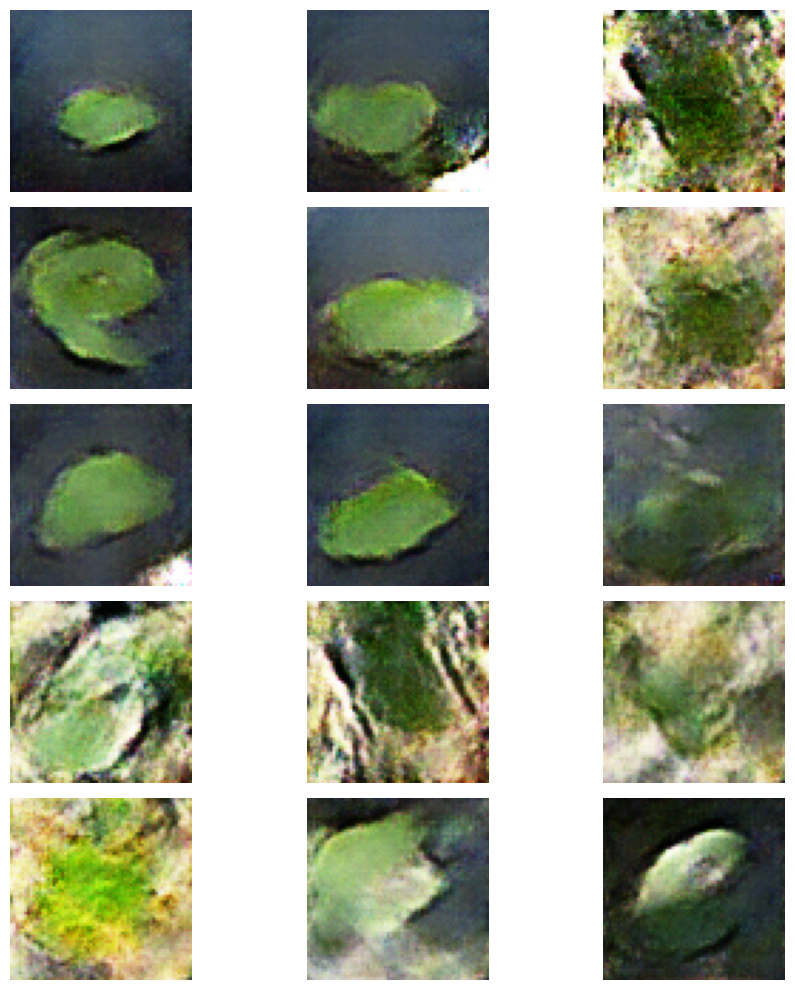

In [98]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Cargar el generador y ponerlo en el mismo dispositivo que los datos
generador = Generador()  # Reemplaza con la instancia correcta
generador.load_state_dict(torch.load('generador4.pth'))
generador.to(device)  # Asegúrate de que el generador esté en el dispositivo correcto
generador.eval()  # Poner el generador en modo evaluación

# Generar imágenes
n_imagenes = 15
ruido = torch.randn(n_imagenes, TAM_ENTRADA).to(device)  # Generar ruido en el mismo dispositivo
imagenes_generadas = generador(ruido)  # Generar imágenes
imagenes_generadas = imagenes_generadas.cpu().detach().numpy()  # Convertir a numpy
imagenes_generadas = (imagenes_generadas * 127.5 + 127.5).astype(np.uint8)  # Normalizar a [0, 255]

# Graficar las imágenes generadas
plt.figure(figsize=(10, 10))
for i in range(n_imagenes):
    plt.subplot(5, 3, i + 1)
    plt.imshow(imagenes_generadas[i].transpose(1, 2, 0))  # Transponer para formato HWC
    plt.axis('off')
plt.tight_layout()
plt.show()


Predicciones

## Cambio de generador y discriminador

Se procedio a probar cambiando la arquitectura del generador y el discriminador aumentando mas cambas, dropout, y batchnorm, con el objetivo de obtener mejores prediciones ya que las anteriores no son tan satisfactorias como las esperadas

### Entrenamiento desde cero

Debido a que estamos cambiando la arquitectura de nuestro generador  y discriminador entonces no podemos aprovechar los modelso que teniamos guardados anterirmente, por lo que se procedio a hacer un nuevo entrenamiento desde cero con los nuevos modelso del generador y discriminador

In [114]:
class Generador(nn.Module):
    def __init__(self):
        super(Generador, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(TAM_ENTRADA, 1024 * 4 * 4, bias=False),
            nn.BatchNorm1d(1024 * 4 * 4, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Unflatten(1, (1024, 4, 4)),
            nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Dropout(0.3),  # Añadir Dropout
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Dropout(0.3),  # Añadir Dropout
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Dropout(0.3),  # Añadir Dropout
            nn.ConvTranspose2d(128, 3, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)


In [115]:
class Discriminador(nn.Module):
    def __init__(self):
        super(Discriminador, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Dropout(0.3),  # Añadir Dropout
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Dropout(0.3),  # Añadir Dropout
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(512, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Dropout(0.3),  # Añadir Dropout
            nn.Conv2d(512, 1024, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(1024, momentum=0.3),
            nn.LeakyReLU(LEAKY_SLOPE),
            nn.Flatten(),
            nn.Linear(1024 * 4 * 4, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [116]:
# Configuración de los optimizadores
lr = 0.0002
beta1 = 0.5  # Para Adam

opt_generador = optim.Adam(generador.parameters(), lr=lr, betas=(beta1, 0.999))
opt_discriminador = optim.Adam(discriminador.parameters(), lr=lr, betas=(beta1, 0.999))

# Configuración de los schedulers (opcional)
scheduler_g = optim.lr_scheduler.StepLR(opt_generador, step_size=50, gamma=0.95)
scheduler_d = optim.lr_scheduler.StepLR(opt_discriminador, step_size=50, gamma=0.95)


# Funcion de entrenamiento final

Luego de las pruebas realizadas con el antiguo modelo de generador y discriminador, se llego al aconclusion que esta es la mejor funcion que da mejores resultados an entrenar la DCGAN en este caso, asi que se utiliza solo esta funcoin apra entrenar con los nuevos modelos

In [107]:
def entrenar_gan(train_loader, epochs=200):
    hist = {'g_loss': [], 'd_loss': []}

    for epoch in range(1, epochs + 1):
        g_loss_epoch = []
        d_loss_epoch = []

        for i, (imagenes_reales, _) in enumerate(train_loader):
            discriminador.train()
            generador.train()

            batch_size = imagenes_reales.size(0)
            imagenes_reales = imagenes_reales.to(device)
            etiquetas_reales = torch.ones(batch_size, 1).to(device)
            etiquetas_falsas = torch.zeros(batch_size, 1).to(device)

            ### Entrenamiento del Discriminador ###
            discriminador.zero_grad()

            salida_reales = discriminador(imagenes_reales)
            perdida_reales = criterio(salida_reales, etiquetas_reales)
            perdida_reales.backward()

            ruido = torch.randn(batch_size, TAM_ENTRADA, device=device)
            imagenes_falsas = generador(ruido)

            salida_falsas = discriminador(imagenes_falsas.detach())
            perdida_falsas = criterio(salida_falsas, etiquetas_falsas)
            perdida_falsas.backward()

            opt_discriminador.step()
            opt_discriminador.zero_grad()

            d_loss_epoch.append(perdida_reales.item() + perdida_falsas.item())

            ### Entrenamiento del Generador ###
            discriminador.eval()
            generador.train()

            generador.zero_grad()

            ruido = torch.randn(batch_size, TAM_ENTRADA, device=device)
            imagenes_falsas = generador(ruido)

            salida_falsas = discriminador(imagenes_falsas)
            perdida_generador = criterio(salida_falsas, etiquetas_reales)
            perdida_generador.backward()

            opt_generador.step()
            opt_generador.zero_grad()

            g_loss_epoch.append(perdida_generador.item())

        avg_d_loss = np.mean(d_loss_epoch)
        avg_g_loss = np.mean(g_loss_epoch)
        hist['d_loss'].append(avg_d_loss)
        hist['g_loss'].append(avg_g_loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Pérdida del Discriminador: {avg_d_loss:.4f}, Pérdida del Generador: {avg_g_loss:.4f}")

        if epoch % 20 == 0:
            graficar_imagenes_generadas(epoch, generador)

        if scheduler_d:
            scheduler_d.step()
        if scheduler_g:
            scheduler_g.step()

    return hist


In [117]:
import torch.nn.init as init

def reinicializar_pesos(modelo):
    for m in modelo.modules():
        if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
            init.normal_(m.weight.data, 0.0, 0.02)
            if m.bias is not None:
                init.constant_(m.bias.data, 0)
reinicializar_pesos(generador)
reinicializar_pesos(discriminador)


In [118]:
# Instanciar el generador y el discriminador
generador = Generador().to(device)
discriminador = Discriminador().to(device)

# Criterio de pérdida (Binary Cross Entropy Loss)
criterio = nn.BCELoss()

# Configurar optimizadores
lr = 0.0002
beta1 = 0.5
opt_generador = optim.Adam(generador.parameters(), lr=lr, betas=(beta1, 0.999))
opt_discriminador = optim.Adam(discriminador.parameters(), lr=lr, betas=(beta1, 0.999))

# Opcional: Configurar learning rate schedulers
scheduler_g = optim.lr_scheduler.StepLR(opt_generador, step_size=50, gamma=0.95)
scheduler_d = optim.lr_scheduler.StepLR(opt_discriminador, step_size=50, gamma=0.95)

hist = entrenar_gan(train_loader, epochs=N_ITS)


Epoch 10/500 - Pérdida del Discriminador: 0.4046, Pérdida del Generador: 11.8017
Epoch 20/500 - Pérdida del Discriminador: 0.0924, Pérdida del Generador: 5.7697
Epoch 30/500 - Pérdida del Discriminador: 0.1038, Pérdida del Generador: 6.4191
Epoch 40/500 - Pérdida del Discriminador: 0.2701, Pérdida del Generador: 4.7872
Epoch 50/500 - Pérdida del Discriminador: 0.8091, Pérdida del Generador: 2.5755
Epoch 60/500 - Pérdida del Discriminador: 0.1190, Pérdida del Generador: 5.2807
Epoch 70/500 - Pérdida del Discriminador: 1.9311, Pérdida del Generador: 6.4222
Epoch 80/500 - Pérdida del Discriminador: 0.0286, Pérdida del Generador: 6.0306
Epoch 90/500 - Pérdida del Discriminador: 0.1150, Pérdida del Generador: 4.3933
Epoch 100/500 - Pérdida del Discriminador: 0.1164, Pérdida del Generador: 4.6459
Epoch 110/500 - Pérdida del Discriminador: 0.2642, Pérdida del Generador: 5.2925
Epoch 120/500 - Pérdida del Discriminador: 0.1702, Pérdida del Generador: 5.3741
Epoch 130/500 - Pérdida del Discrimi

In [119]:
import torch

# Ruta para guardar los modelos
ruta_generador = 'generadorv21.pth'
ruta_discriminador = 'discriminadorv21.pth'

# Guardar el estado del generador y del discriminador
torch.save(generador.state_dict(), ruta_generador)
torch.save(discriminador.state_dict(), ruta_discriminador)

print(f"Modelos guardados en {ruta_generador} y {ruta_discriminador}")

Modelos guardados en generadorv21.pth y discriminadorv21.pth


Nuevamente guardamos los modelos pero con otros nombres para diferencial de los modelos antiguos

In [120]:
# Criterio de pérdida (Binary Cross Entropy Loss)
criterio = nn.BCELoss()

# Configurar optimizadores
lr = 0.0002
beta1 = 0.5
opt_generador = optim.Adam(generador.parameters(), lr=lr, betas=(beta1, 0.999))
opt_discriminador = optim.Adam(discriminador.parameters(), lr=lr, betas=(beta1, 0.999))

# Opcional: Configurar learning rate schedulers
scheduler_g = optim.lr_scheduler.StepLR(opt_generador, step_size=50, gamma=0.95)
scheduler_d = optim.lr_scheduler.StepLR(opt_discriminador, step_size=50, gamma=0.95)

hist = entrenar_gan(train_loader, epochs=N_ITS)

Epoch 10/500 - Pérdida del Discriminador: 0.0493, Pérdida del Generador: 6.1581
Epoch 20/500 - Pérdida del Discriminador: 0.0509, Pérdida del Generador: 5.7083
Epoch 30/500 - Pérdida del Discriminador: 0.0984, Pérdida del Generador: 7.7194
Epoch 40/500 - Pérdida del Discriminador: 0.1118, Pérdida del Generador: 6.2102
Epoch 50/500 - Pérdida del Discriminador: 0.0452, Pérdida del Generador: 6.2061
Epoch 60/500 - Pérdida del Discriminador: 0.0198, Pérdida del Generador: 6.7789
Epoch 70/500 - Pérdida del Discriminador: 0.0179, Pérdida del Generador: 6.8236
Epoch 80/500 - Pérdida del Discriminador: 0.0098, Pérdida del Generador: 7.4161
Epoch 90/500 - Pérdida del Discriminador: 0.8502, Pérdida del Generador: 6.4643
Epoch 100/500 - Pérdida del Discriminador: 0.0653, Pérdida del Generador: 6.3488
Epoch 110/500 - Pérdida del Discriminador: 0.0480, Pérdida del Generador: 5.8565
Epoch 120/500 - Pérdida del Discriminador: 0.0303, Pérdida del Generador: 6.6584
Epoch 130/500 - Pérdida del Discrimin

In [121]:
import torch

# Ruta para guardar los modelos
ruta_generador = 'generadorv22.pth'
ruta_discriminador = 'discriminadorv22.pth'

# Guardar el estado del generador y del discriminador
torch.save(generador.state_dict(), ruta_generador)
torch.save(discriminador.state_dict(), ruta_discriminador)

print(f"Modelos guardados en {ruta_generador} y {ruta_discriminador}")

Modelos guardados en generadorv22.pth y discriminadorv22.pth


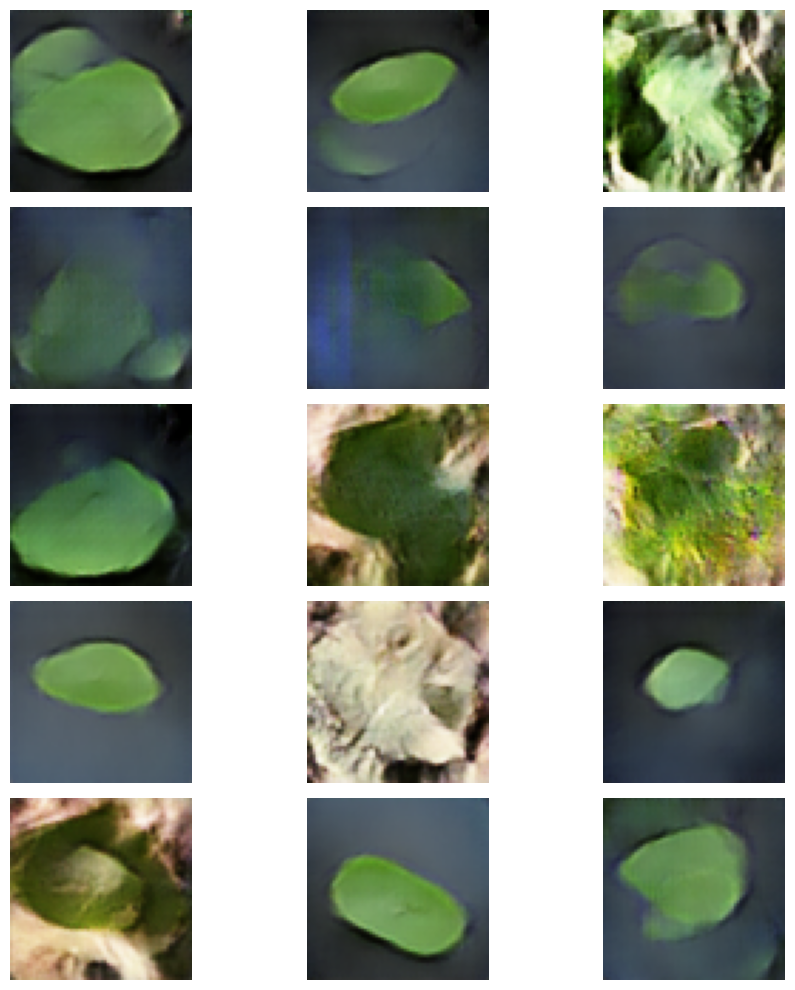

In [124]:
generador.eval()  # Poner el generador en modo evaluación

# Generar imágenes
n_imagenes = 15
ruido = torch.randn(n_imagenes, TAM_ENTRADA).to(device)  # Generar ruido en el mismo dispositivo
imagenes_generadas = generador(ruido)  # Generar imágenes
imagenes_generadas = imagenes_generadas.cpu().detach().numpy()  # Convertir a numpy
imagenes_generadas = (imagenes_generadas * 127.5 + 127.5).astype(np.uint8)  # Normalizar a [0, 255]

# Graficar las imágenes generadas
plt.figure(figsize=(10, 10))
for i in range(n_imagenes):
    plt.subplot(5, 3, i + 1)
    plt.imshow(imagenes_generadas[i].transpose(1, 2, 0))  # Transponer para formato HWC
    plt.axis('off')
plt.tight_layout()
plt.show()

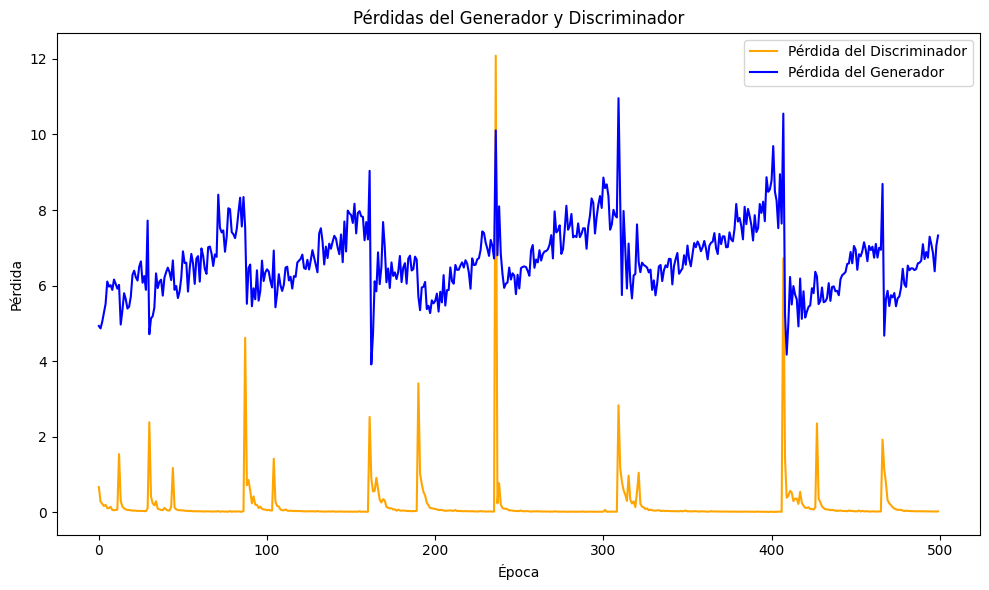

In [123]:
import matplotlib.pyplot as plt

def graficar_pérdidas(hist):
    plt.figure(figsize=(10, 6))

    # Graficar pérdidas del discriminador en naranja
    plt.plot(hist['d_loss'], label='Pérdida del Discriminador', color='orange')

    # Graficar pérdidas del generador en azul
    plt.plot(hist['g_loss'], label='Pérdida del Generador', color='blue')

    # Configurar etiquetas y título
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.title('Pérdidas del Generador y Discriminador')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Llamar a la función con el historial de pérdidas
graficar_pérdidas(hist)


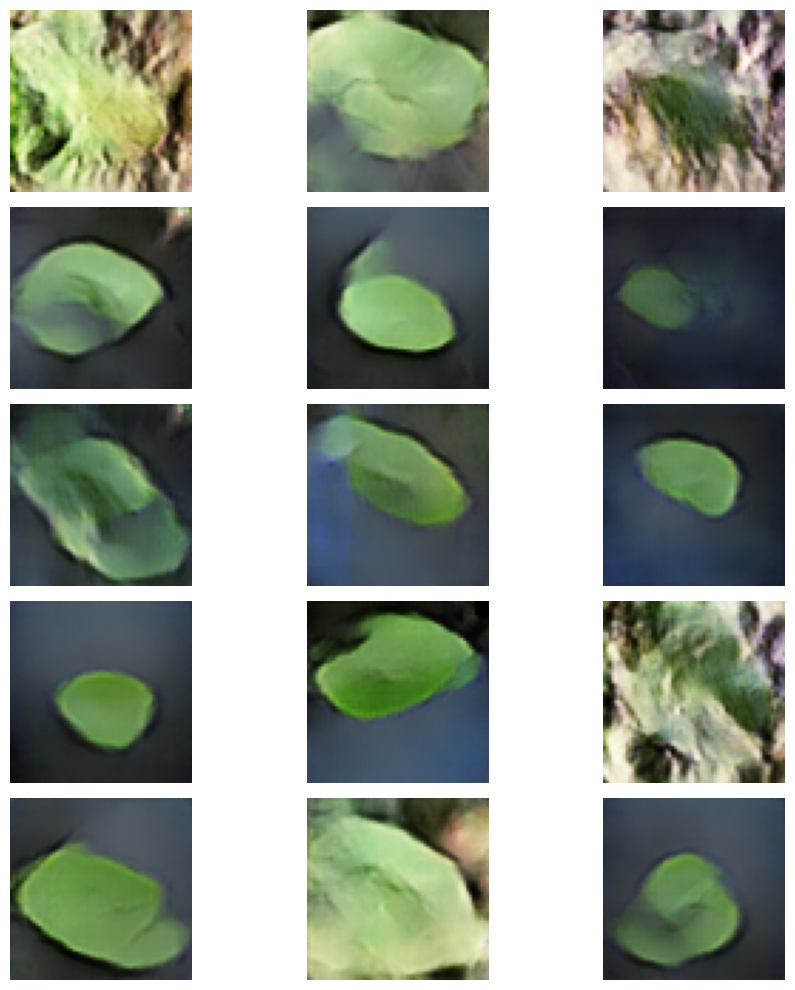

In [125]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Cargar el generador y ponerlo en el mismo dispositivo que los datos
generador = Generador()  # Reemplaza con la instancia correcta
generador.load_state_dict(torch.load('generadorv22.pth'))
generador.to(device)  # Asegúrate de que el generador esté en el dispositivo correcto
generador.eval()  # Poner el generador en modo evaluación

# Generar imágenes
n_imagenes = 15
ruido = torch.randn(n_imagenes, TAM_ENTRADA).to(device)  # Generar ruido en el mismo dispositivo
imagenes_generadas = generador(ruido)  # Generar imágenes
imagenes_generadas = imagenes_generadas.cpu().detach().numpy()  # Convertir a numpy
imagenes_generadas = (imagenes_generadas * 127.5 + 127.5).astype(np.uint8)  # Normalizar a [0, 255]

# Graficar las imágenes generadas
plt.figure(figsize=(10, 10))
for i in range(n_imagenes):
    plt.subplot(5, 3, i + 1)
    plt.imshow(imagenes_generadas[i].transpose(1, 2, 0))  # Transponer para formato HWC
    plt.axis('off')
plt.tight_layout()
plt.show()


Finalizamos mostrando imagenes generadas por el generador, a pesar de tener aun un error elevado (luego de 1000 episodios en el nuevo entrenamiento con los nuevos modelos) se puede ver que ya gernera algunas imagenes qeu sí parecen hojas, destacando que genera de mejor forma las imagenes en las que el fondo no tiene ruido de otras hojas, ramas y es un color fijo y estable.